### DATOS DE VENTAS DE JUGUETES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### LEYENDO TABLAS

In [2]:
SDS = pd.read_excel('sales.xlsx',
                    sheet_name = 'sales_data_sample')
Variables = pd.read_excel('sales.xlsx',
                          sheet_name = 'Variables')
DetalleOrden = pd.read_excel('sales.xlsx',
                             sheet_name = 'DetalleOrden')
Producto = pd.read_excel('sales.xlsx',
                         sheet_name = 'Producto')
Cliente = pd.read_excel('sales.xlsx',
                        sheet_name = 'Cliente')
Orden = pd.read_excel('sales.xlsx',
                      sheet_name = 'Orden')

### ARMANDO BASE DE DATOS

In [3]:
FairJoin = DetalleOrden.join(Cliente.set_index('ID_Cliente'),
                              on = 'ID_Cliente').join(Orden.set_index('ORDERNUMBER'),
                              on = 'ORDERNUMBER').join(Producto.set_index('PRODUCTCODE'),
                              on = 'PRODUCTCODE')

In [44]:
FairJoin

,ORDERNUMBER,ID_Cliente,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,PRODUCTCODE,DEALSIZE,CUSTOMERNAME,PHONE,...,CONTACTLASTNAME,CONTACTFIRSTNAME,ORDERDATE,DAY_ID,QTR_ID,MONTH_ID,YEAR_ID,STATUS,PRODUCTLINE,MSRP
0,10107,C046,30,95.70,2,2871.00,S10_1678,Small,Land of Toys Inc.,2125557818,...,Yu,Kwai,2003-02-24,24,1,2,2003,Shipped,Motorcycles,95
1,10121,C068,34,81.35,5,2765.90,S10_1678,Small,Reims Collectables,26.47.1555,...,Henriot,Paul,2003-05-07,7,2,5,2003,Shipped,Motorcycles,95
2,10134,C048,41,94.74,2,3884.34,S10_1678,Medium,Lyon Souveniers,+33 1 46 62 7555,...,Da Cunha,Daniel,2003-07-01,1,3,7,2003,Shipped,Motorcycles,95
3,10145,C087,45,83.26,6,3746.70,S10_1678,Medium,Toys4GrownUps.com,6265557265,...,Young,Julie,2003-08-25,25,3,8,2003,Shipped,Motorcycles,95
4,10159,C024,49,100.00,14,5205.27,S10_1678,Medium,Corporate Gift Ideas Co.,6505551386,...,Brown,Julie,2003-10-10,10,4,10,2003,Shipped,Motorcycles,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,C034,20,100.00,15,2244.40,S72_3212,Small,Euro Shopping Channel,(91) 555 94 44,...,Freyre,Diego,2004-12-02,2,4,12,2004,Shipped,Ships,54
2819,10373,C065,29,100.00,1,3978.51,S72_3212,Medium,"Oulu Toy Supplies, Inc.",981-443655,...,Koskitalo,Pirkko,2005-01-31,31,1,1,2005,Shipped,Ships,54
2820,10386,C034,43,100.00,4,5417.57,S72_3212,Medium,Euro Shopping Channel,(91) 555 94 44,...,Freyre,Diego,2005-03-01,1,1,3,2005,Resolved,Ships,54
2821,10397,C001,34,62.24,1,2116.16,S72_3212,Small,Alpha Cognac,61.77.6555,...,Roulet,Annette,2005-03-28,28,1,3,2005,Shipped,Ships,54


### 1 DESCRIPTIVOS

- Se observa como la cantidad de piezas pedidas está entre 20 y 50 por producto cliente y orden
- La mayor parte de las ventas en este sentido se encuentran entre 2,200 y 4,500, con una media de 3,500 aproximadamente
- Las ventas se disparan en noviembre de cada año, y pausan en julio
- Quienes más órdenes realizan son:

1. Euro Shopping Channel (259)
2. Mini Gifts Distributors Ltd. (180)
3. Australian Collectors, Co (55)
4. La Rochelle Gifts (53)
5. AV Stores, Co. (51)
6. Land of Toys Inc. (49)
7. Muscle Machine Inc. (48)
8. Rovelli Gifts (48)
9. Anna's Decorations, Ltd. (46)
10. Souvenirs And Things Co. (46)

- Se venden muchas más piezas pequeñas y medianas que grandes
- California, Maine y Nueva York son los tres estados que realizan más órdenes
- Madrid, San Rafael (CA) y NYC, las ciudades de donde más órdenes surgen
- Fuera de USA, EMEA es la región con mayores compras

In [5]:
FairJoinNum = FairJoin[['QUANTITYORDERED','PRICEEACH','SALES','MSRP', 'MONTH_ID', 'YEAR_ID']]
FairJoinNum.describe()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP,MONTH_ID,YEAR_ID
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000
mean,35.092809,83.658544,3553.889072,100.715551,7.092455,2003.81509
std,9.741443,20.174277,1841.865106,40.187912,3.656633,0.69967
min,6.000000,26.880000,482.130000,33.000000,1.000000,2003.00000
25%,27.000000,68.860000,2203.430000,68.000000,4.000000,2003.00000
50%,35.000000,95.700000,3184.800000,99.000000,8.000000,2004.00000
75%,43.000000,100.000000,4508.000000,124.000000,11.000000,2004.00000
max,97.000000,100.000000,14082.800000,214.000000,12.000000,2005.00000


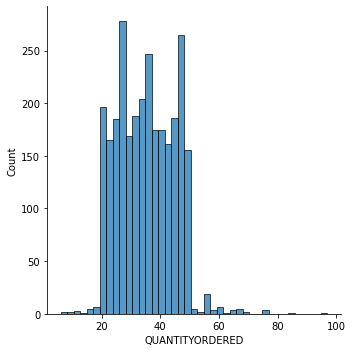

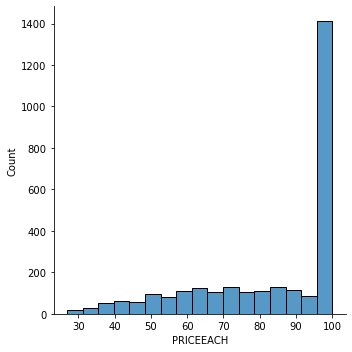

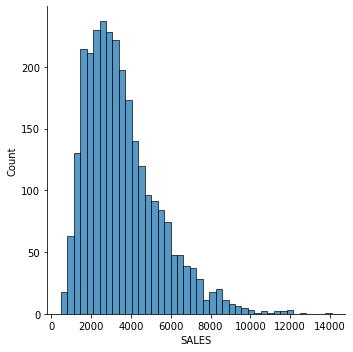

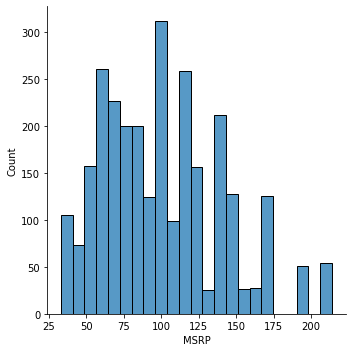

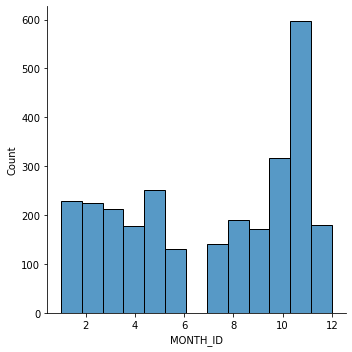

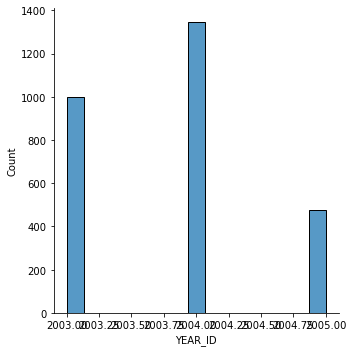

In [6]:
variables = FairJoinNum.columns
for x in variables:
    sns.displot(data = FairJoin, x = x);

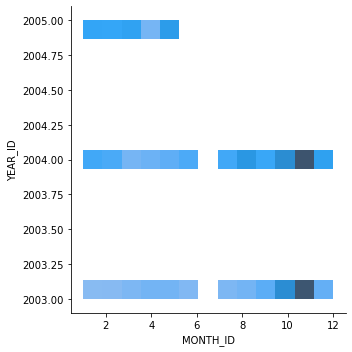

In [7]:
sns.displot(FairJoin, x = 'MONTH_ID', y = 'YEAR_ID')

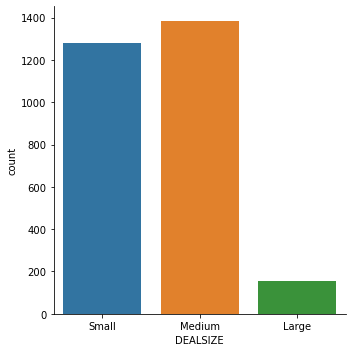

In [8]:
sns.catplot(x = 'DEALSIZE', data = FairJoin, kind = 'count')

In [9]:
FairJoin[['CUSTOMERNAME']].value_counts().to_frame(name = 'count').head(10)

,count
CUSTOMERNAME,
Euro Shopping Channel,259
Mini Gifts Distributors Ltd.,180
"Australian Collectors, Co.",55
La Rochelle Gifts,53
"AV Stores, Co.",51
Land of Toys Inc.,49
Muscle Machine Inc,48
Rovelli Gifts,48
"Anna's Decorations, Ltd",46


In [10]:
FairJoin[['STATE']].value_counts().to_frame(name = 'count')

,count
STATE,
CA,416
MA,190
NY,178
NSW,92
Victoria,78
PA,75
CT,61
BC,48
NH,34


In [11]:
FairJoin[['CITY']].value_counts().to_frame(name = 'count').head(10)

,count
CITY,
Madrid,304
San Rafael,180
NYC,152
Singapore,79
Paris,70
San Francisco,62
New Bedford,61
Nantes,60
Melbourne,55


In [12]:
FairJoin[FairJoin['CITY'] == 'San Rafael'][['CITY', 'STATE', 'COUNTRY']]

,CITY,STATE,COUNTRY
44,San Rafael,CA,USA
48,San Rafael,CA,USA
144,San Rafael,CA,USA
155,San Rafael,CA,USA
163,San Rafael,CA,USA
...,...,...,...
2637,San Rafael,CA,USA
2638,San Rafael,CA,USA
2694,San Rafael,CA,USA
2720,San Rafael,CA,USA


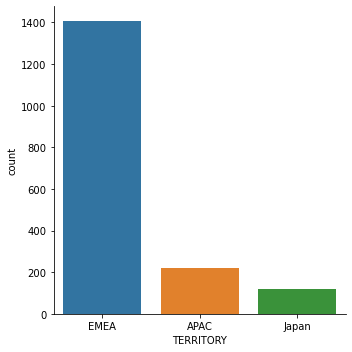

In [13]:
sns.catplot(x = 'TERRITORY', data = FairJoin, kind = 'count')

### 2 SEGMENTACIÓN DE CLIENTES RFM

### Calculando Recency, Frequency, Monetary Value

In [14]:
FairJoin['ORDERDATE'] = pd.to_datetime(FairJoin['ORDERDATE'])
FairJoinD = FairJoin[(FairJoin['ORDERDATE'] >= '2003-1-1') & (FairJoin['ORDERDATE'] <= '2005-5-31')] #Para el rango de fechas sugerido
FairRFM_FR = FairJoinD.groupby('ID_Cliente').size().to_frame(name = 'Frequency')
FairRFM_MV = FairJoinD.groupby('ID_Cliente')['SALES'].sum().to_frame(name = 'Monetary Value')
FairRFM_LP = FairJoinD.sort_values('ORDERDATE').groupby('ID_Cliente').tail(1).set_index('ID_Cliente')['ORDERDATE'].to_frame(name = 'Last Purchase').sort_index()
FairRFM = FairRFM_LP.join(FairRFM_FR).join(FairRFM_MV)
FairRFM.reset_index(level=0, inplace=True)
Today = pd.to_datetime('2021-11-10')
FairRFM['Recency'] = Today - FairRFM['Last Purchase']
FairRFM['Recency'] = FairRFM['Recency'].dt.days
FairRFM.drop('Last Purchase', axis = 'columns', inplace = True)
FairRFM

,ID_Cliente,Frequency,Monetary Value,Recency
0,C001,20,70488.44,6071
1,C002,26,94117.26,6271
2,C003,46,153996.13,6090
3,C004,7,24179.96,6194
4,C005,23,64591.46,6029
...,...,...,...,...
87,C088,29,118008.27,6060
88,C089,31,117713.56,6281
89,C090,25,88041.26,6214
90,C091,19,75754.88,6200


### Calculando Scores

In [15]:
FairRFM['Frequency Score'] = pd.cut(FairRFM['Frequency'],
                                     bins = [-1,
                                           np.percentile(FairRFM['Frequency'], 20),
                                           np.percentile(FairRFM['Frequency'], 40),
                                           np.percentile(FairRFM['Frequency'], 60),
                                           np.percentile(FairRFM['Frequency'], 80),
                                           FairRFM['Frequency'].max()],
                                     labels = [1, 2, 3, 4, 5]).astype("int")

FairRFM['Monetary Value Score'] = pd.cut(FairRFM['Monetary Value'],
                                     bins = [-1,
                                           np.percentile(FairRFM['Monetary Value'], 20),
                                           np.percentile(FairRFM['Monetary Value'], 40),
                                           np.percentile(FairRFM['Monetary Value'], 60),
                                           np.percentile(FairRFM['Monetary Value'], 80),
                                           FairRFM['Monetary Value'].max()],
                                     labels = [1, 2, 3, 4, 5]).astype("int")

FairRFM['Recency Score'] = pd.cut(FairRFM['Recency'],
                                     bins = [-1,
                                           np.percentile(FairRFM['Recency'], 20),
                                           np.percentile(FairRFM['Recency'], 40),
                                           np.percentile(FairRFM['Recency'], 60),
                                           np.percentile(FairRFM['Recency'], 80),
                                           FairRFM['Recency'].max()],
                                     labels = [5, 4, 3, 2, 1]).astype("int")

In [16]:
FairRFM

,ID_Cliente,Frequency,Monetary Value,Recency,Frequency Score,Monetary Value Score,Recency Score
0,C001,20,70488.44,6071,2,2,4
1,C002,26,94117.26,6271,3,3,1
2,C003,46,153996.13,6090,5,5,4
3,C004,7,24179.96,6194,1,1,3
4,C005,23,64591.46,6029,2,1,5
...,...,...,...,...,...,...,...
87,C088,29,118008.27,6060,4,4,5
88,C089,31,117713.56,6281,4,4,1
89,C090,25,88041.26,6214,3,3,2
90,C091,19,75754.88,6200,2,2,3


### Clientes Potenciales

In [17]:
RFM_Pot = FairRFM[(FairRFM['Recency Score'] > 3) & (FairRFM['Frequency Score'] > 3) & (FairRFM['Monetary Value Score'] > 3)]
RFM_Pot = RFM_Pot[['ID_Cliente', 'Recency Score', 'Frequency Score', 'Monetary Value Score']]
RFM_Pot = RFM_Pot.join(Cliente.set_index('ID_Cliente'), on = 'ID_Cliente')
RFM_Pot[['ID_Cliente', 'CUSTOMERNAME']]

,ID_Cliente,CUSTOMERNAME
2,C003,"Anna's Decorations, Ltd"
23,C024,Corporate Gift Ideas Co.
27,C028,Danish Wholesale Imports
28,C029,Diecast Classics Inc.
31,C032,"Dragon Souveniers, Ltd."
33,C034,Euro Shopping Channel
39,C040,Handji Gifts& Co
44,C045,La Rochelle Gifts
46,C047,L'ordine Souveniers
55,C056,Mini Creations Ltd.


### Clientes Perdidos

In [18]:
RFM_Per = FairRFM[(FairRFM['Recency Score'] < 4) & (FairRFM['Frequency Score'] < 4) & (FairRFM['Monetary Value Score'] < 4)]
RFM_Per = RFM_Per[['ID_Cliente', 'Recency Score', 'Frequency Score', 'Monetary Value Score']]
RFM_Per = RFM_Per.join(Cliente.set_index('ID_Cliente'), on = 'ID_Cliente')
RFM_Per[['ID_Cliente', 'CUSTOMERNAME']]

,ID_Cliente,CUSTOMERNAME
1,C002,Amica Models & Co.
3,C004,Atelier graphique
7,C008,Auto Assoc. & Cie.
9,C010,Auto-Moto Classics Inc.
12,C013,"Bavarian Collectables Imports, Co."
13,C014,"Blauer See Auto, Co."
15,C016,CAF Imports
16,C017,Cambridge Collectables Co.
17,C018,Canadian Gift Exchange Network
18,C019,"Classic Gift Ideas, Inc"


### Clientes Derrochadores

In [19]:
RFM_Der = FairRFM[FairRFM['Monetary Value Score'] == 5]
RFM_Der = RFM_Der[['ID_Cliente', 'Recency Score', 'Frequency Score', 'Monetary Value Score']]
RFM_Der = RFM_Der.join(Cliente.set_index('ID_Cliente'), on = 'ID_Cliente')
RFM_Der[['ID_Cliente', 'CUSTOMERNAME']]

,ID_Cliente,CUSTOMERNAME
2,C003,"Anna's Decorations, Ltd"
5,C006,"Australian Collectors, Co."
10,C011,"AV Stores, Co."
23,C024,Corporate Gift Ideas Co.
27,C028,Danish Wholesale Imports
31,C032,"Dragon Souveniers, Ltd."
33,C034,Euro Shopping Channel
44,C045,La Rochelle Gifts
45,C046,Land of Toys Inc.
46,C047,L'ordine Souveniers


### Clientes Leales

In [20]:
RFM_Lea = FairRFM[FairRFM['Frequency Score'] > 3]
RFM_Lea = RFM_Lea[['ID_Cliente', 'Recency Score', 'Frequency Score', 'Monetary Value Score']]
RFM_Lea = RFM_Lea.join(Cliente.set_index('ID_Cliente'), on = 'ID_Cliente')
RFM_Lea[['ID_Cliente', 'CUSTOMERNAME']]

,ID_Cliente,CUSTOMERNAME
2,C003,"Anna's Decorations, Ltd"
5,C006,"Australian Collectors, Co."
10,C011,"AV Stores, Co."
11,C012,Baane Mini Imports
23,C024,Corporate Gift Ideas Co.
24,C025,"Corrida Auto Replicas, Ltd"
27,C028,Danish Wholesale Imports
28,C029,Diecast Classics Inc.
31,C032,"Dragon Souveniers, Ltd."
33,C034,Euro Shopping Channel


### Clientes Nuevos

In [21]:
RFM_Nue = FairRFM[FairRFM['Recency Score'] > 3]
RFM_Nue = RFM_Nue[['ID_Cliente', 'Recency Score', 'Frequency Score', 'Monetary Value Score']]
RFM_Nue = RFM_Nue.join(Cliente.set_index('ID_Cliente'), on = 'ID_Cliente')
RFM_Nue[['ID_Cliente', 'CUSTOMERNAME']]

,ID_Cliente,CUSTOMERNAME
0,C001,Alpha Cognac
2,C003,"Anna's Decorations, Ltd"
4,C005,"Australian Collectables, Ltd"
6,C007,"Australian Gift Network, Co"
8,C009,Auto Canal Petit
14,C015,Boards & Toys Co.
22,C023,Collectables For Less Inc.
23,C024,Corporate Gift Ideas Co.
27,C028,Danish Wholesale Imports
28,C029,Diecast Classics Inc.


### 3 SEGMENTACIÓN POR K MEDIAS

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [23]:
FairKM = FairRFM[['ID_Cliente', 'Frequency', 'Monetary Value', 'Recency']]
FairKM

,ID_Cliente,Frequency,Monetary Value,Recency
0,C001,20,70488.44,6071
1,C002,26,94117.26,6271
2,C003,46,153996.13,6090
3,C004,7,24179.96,6194
4,C005,23,64591.46,6029
...,...,...,...,...
87,C088,29,118008.27,6060
88,C089,31,117713.56,6281
89,C090,25,88041.26,6214
90,C091,19,75754.88,6200


In [24]:
FairKM.describe()

,Frequency,Monetary Value,Recency
count,92.000000,92.000000,92.000000
mean,30.684783,109050.313587,6188.826087
std,30.934503,110308.612808,131.420524
min,3.000000,9129.350000,6007.000000
25%,19.750000,70129.432500,6087.250000
50%,26.000000,86522.610000,6192.000000
75%,32.500000,120575.875000,6236.250000
max,259.000000,912294.110000,6515.000000


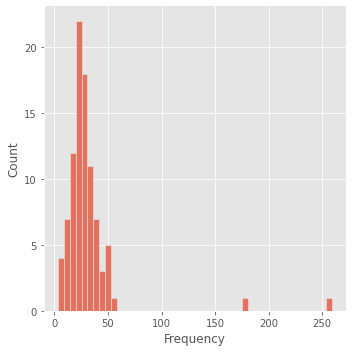

In [25]:
sns.displot(FairKM, x = 'Frequency')

### Filtrando Valores Atípicos

In [26]:
FairKMF = FairKM[FairKM['Frequency'] < 150]
FairKMF.describe()

,Frequency,Monetary Value,Recency
count,90.000000,90.000000,90.000000
mean,26.488889,94060.852000,6192.844444
std,11.154930,40218.343211,130.032054
min,3.000000,9129.350000,6007.000000
25%,19.250000,69411.417500,6091.500000
50%,25.500000,85363.790000,6194.500000
75%,32.000000,117934.592500,6236.750000
max,55.000000,200995.410000,6515.000000


### Atípicos notables

**Existen dos clientes con muy alta frecuencia y compra**

In [27]:
FairKM[FairKM['Frequency'] > 150].join(Cliente.set_index('ID_Cliente'), on = 'ID_Cliente')

,ID_Cliente,Frequency,Monetary Value,Recency,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME
33,C034,259,912294.11,6007,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego
56,C057,180,654858.06,6009,Mini Gifts Distributors Ltd.,4155551450,5677 Strong St.,NaN,San Rafael,CA,97562,USA,NaN,Nelson,Valarie


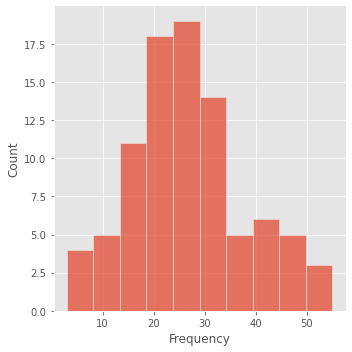

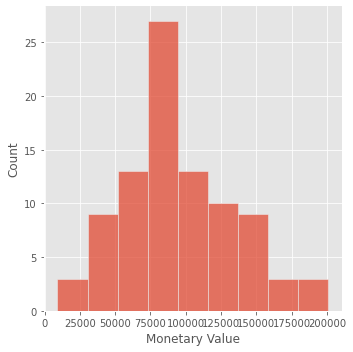

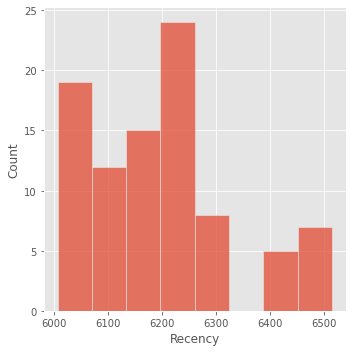

In [28]:
for x in ['Frequency', 'Monetary Value', 'Recency']:
    sns.displot(FairKMF, x = x);

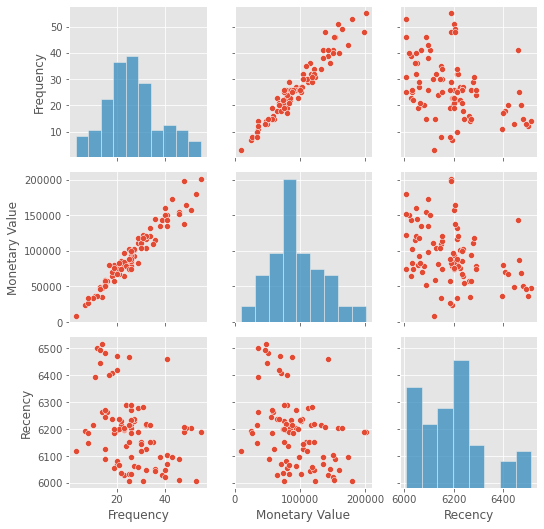

In [29]:
g = sns.PairGrid(FairKMF)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

### Buscando K

**Como se observa el codo está muy suavizado. De 2 a 4 conglomerados serían soluciones igual de buenas. Se exploran estas tres opciones.**

Text(0, 0.5, 'Score')

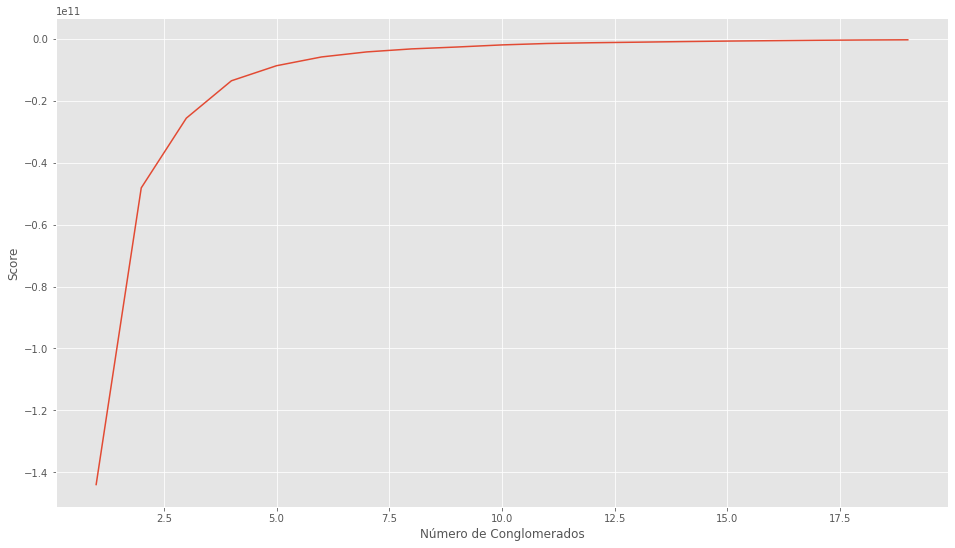

In [30]:
X = np.array(FairKMF[['Frequency', 'Monetary Value', 'Recency']])
y = np.array(FairKMF['ID_Cliente'])
X.shape
N = range(1, 20)
kmeans = [KMeans(n_clusters = i) for i in N]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(N,score)
plt.xlabel('Número de Conglomerados')
plt.ylabel('Score')

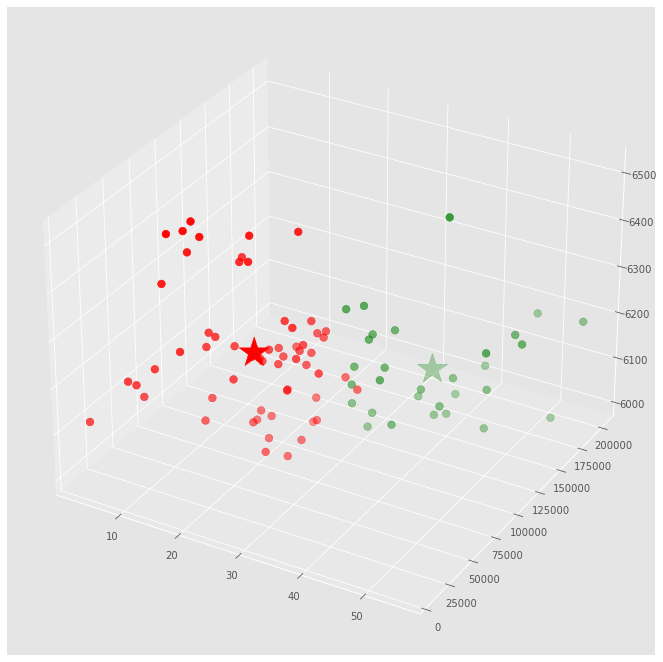

In [31]:
kmeans = KMeans(n_clusters = 2).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores = ['red', 'green']
asignar = []
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = asignar,s = 60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', c = colores, s = 1000)

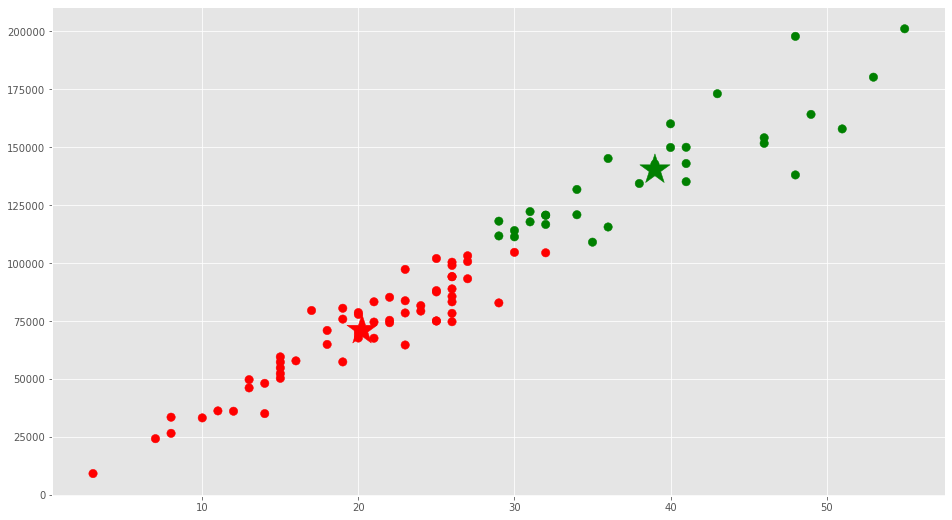

In [32]:
f1 = FairKMF['Frequency'].values
f2 = FairKMF['Monetary Value'].values
 
plt.scatter(f1, f2, c = asignar, s = 70)
plt.scatter(C[:, 0], C[:, 1], marker = '*', c = colores, s = 1000)

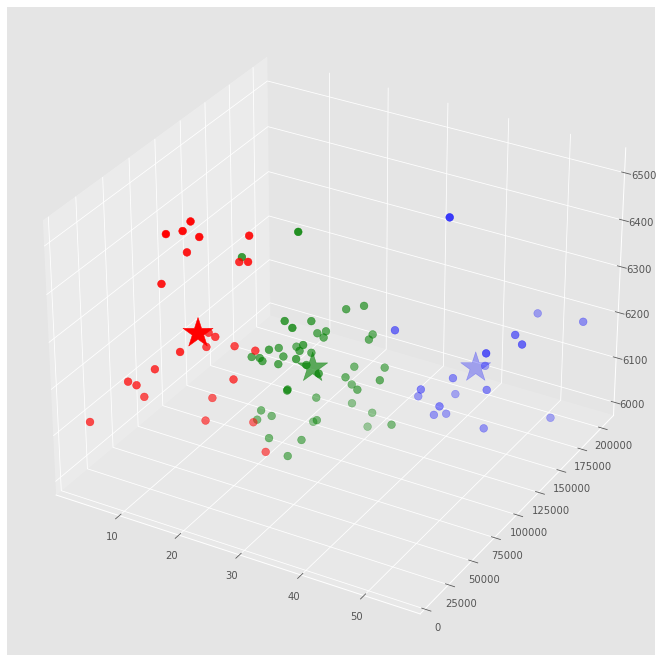

In [33]:
kmeans = KMeans(n_clusters = 3).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores = ['red', 'green','blue']
asignar = []
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', c = colores, s = 1000)

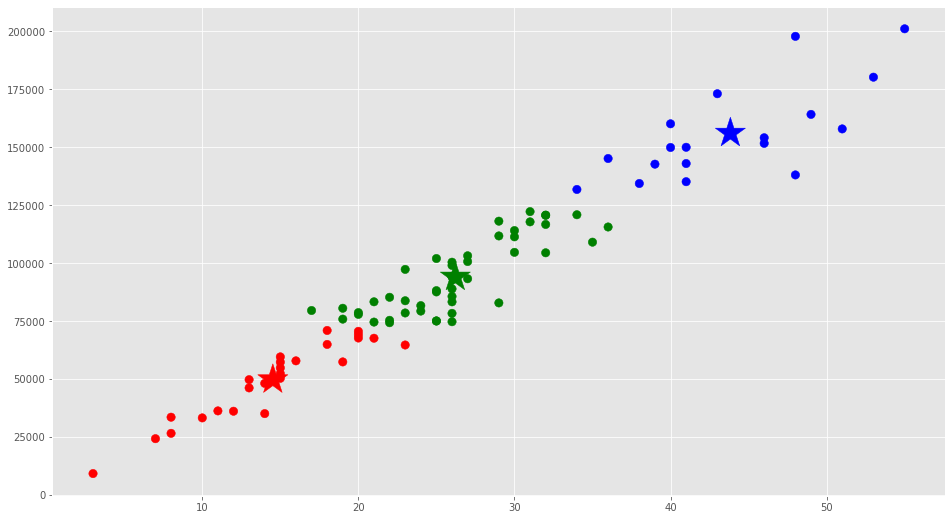

In [34]:
f1 = FairKMF['Frequency'].values
f2 = FairKMF['Monetary Value'].values
 
plt.scatter(f1, f2, c = asignar, s = 70)
plt.scatter(C[:, 0], C[:, 1], marker = '*', c = colores, s = 1000)

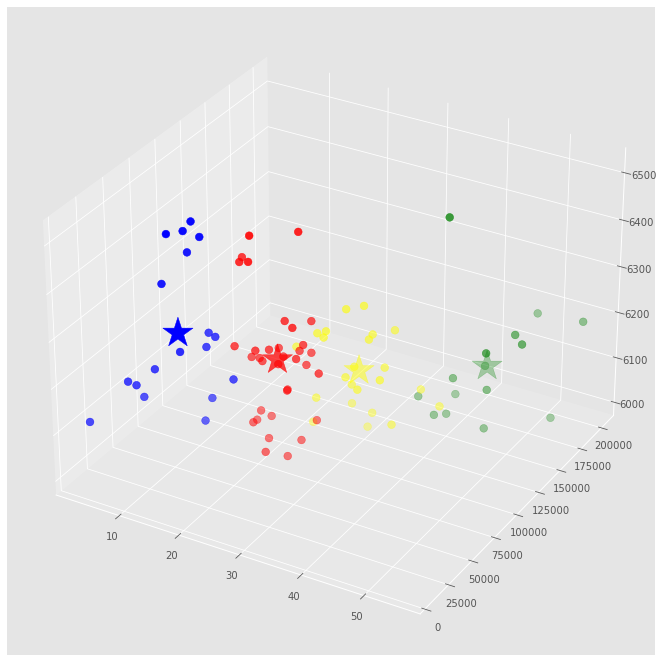

In [35]:
kmeans = KMeans(n_clusters = 4).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores = ['red', 'green', 'blue', 'yellow']
asignar = []
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = asignar, s = 60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', c = colores, s = 1000)

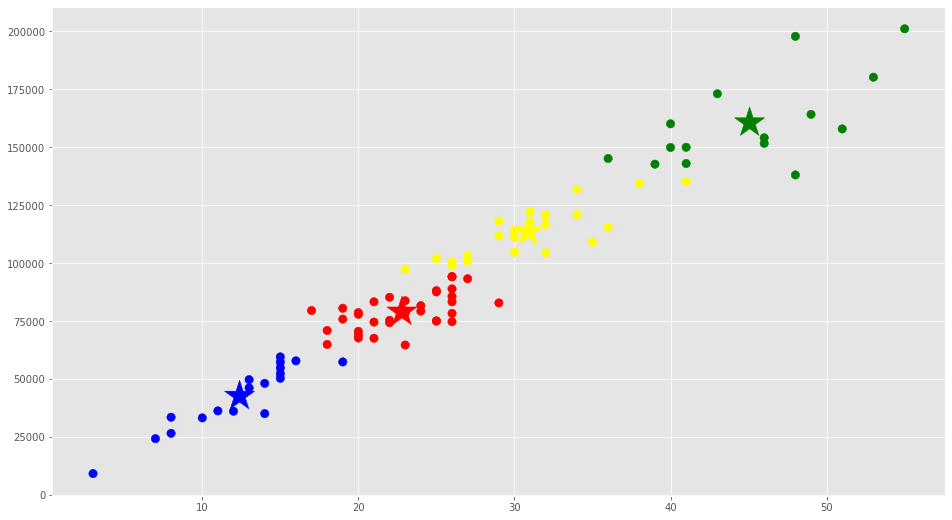

In [36]:
f1 = FairKMF['Frequency'].values
f2 = FairKMF['Monetary Value'].values
 
plt.scatter(f1, f2, c = asignar, s = 70)
plt.scatter(C[:, 0], C[:, 1], marker = '*', c = colores, s = 1000)

In [37]:
#pd.options.display.float_format = '{:.2f}'.format
FairKMF.quantile([.6, .8], axis = 0)

,Frequency,Monetary Value,Recency
0.6,26.4,99476.870,6205.2
0.8,35.2,124047.572,6266.0


### Comparación

**El Modelo RFM da una solución rápida y fácil de explicar que segmenta a los clientes en "Potenciales" y "Perdidos", y que identifica a "Derrochadores" y a "Leales" de manera similar al modelo de dos  o de cuatro conglomerados. Ambos métodos coinciden, por lo que se recomienda presentar el más económico.**

### 4 MODELO DE RECOMENDACIÓN

**Se toma el número de orden, código de producto y la cantidad ordenada. Y se pivotea convirtiendo a los productos en columnas con valor el número de piezas compradas por orden (asignando ceros a los productos no pedidos).**

In [38]:
FairRS = FairJoinD[['ORDERNUMBER', 'QUANTITYORDERED', 'PRODUCTCODE']].sort_values('ORDERNUMBER')
FairRS

,ORDERNUMBER,QUANTITYORDERED,PRODUCTCODE
578,10100,30,S18_1749
2024,10100,49,S24_3969
680,10100,50,S18_2248
1267,10100,22,S18_4409
728,10101,25,S18_2325
...,...,...,...
2405,10425,18,S50_1392
393,10425,33,S12_4473
160,10425,38,S10_4962
780,10425,19,S18_2432


In [39]:
FairMatrix = FairRS.pivot(index = 'ORDERNUMBER', columns = 'PRODUCTCODE', values = 'QUANTITYORDERED')
FairMatrix.fillna(0, inplace = True)
FairMatrix

PRODUCTCODE,S10_1678,S10_1949,S10_2016,S10_4698,S10_4757,S10_4962,S12_1099,S12_1108,S12_1666,S12_2823,...,S700_2466,S700_2610,S700_2824,S700_2834,S700_3167,S700_3505,S700_3962,S700_4002,S72_1253,S72_3212
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,
10100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10103,0.0,26.0,0.0,0.0,0.0,42.0,0.0,0.0,27.0,0.0,...,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se calcula una matriz de distancias entre productos

In [40]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

matrix = pd.DataFrame(
    squareform(pdist(FairMatrix)),
    columns = FairMatrix.index,
    index = FairMatrix.index
)

matrix

ORDERNUMBER,10100,10101,10102,10103,10104,10105,10106,10107,10108,10109,...,10415,10416,10417,10419,10420,10421,10422,10423,10424,10425
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,
10100,0.000000,108.291274,97.401232,159.705980,148.620322,165.269477,180.599003,114.830310,162.769776,119.360798,...,111.530265,151.924323,136.981751,168.665349,141.770942,95.446320,97.524356,94.931554,137.222447,148.822041
10101,108.291274,0.000000,92.973114,157.044580,145.756647,162.699109,178.249825,111.099055,160.159296,115.775645,...,107.684725,149.124109,133.869339,166.147525,152.151241,52.602281,93.102094,90.382520,134.115622,145.962324
10102,97.401232,92.973114,0.000000,149.743113,137.858623,155.663098,171.851680,100.513681,153.006536,105.659832,...,96.726418,141.414285,125.223800,159.263932,164.954539,77.633756,20.000000,77.000000,125.487051,138.076066
10103,159.705980,157.044580,149.743113,0.000000,187.147001,200.624026,213.429145,161.623018,198.569887,164.872678,...,159.295323,189.781453,178.044938,203.430578,207.915848,148.478955,149.823229,121.885192,113.066352,149.164339
10104,148.620322,145.756647,137.858623,187.147001,0.000000,191.916649,205.265681,150.678466,189.768280,147.135992,...,148.178946,180.551932,168.172530,190.672494,199.526941,136.484431,137.945641,136.124943,168.368643,124.851912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10421,95.446320,52.602281,77.633756,148.478955,136.484431,154.447402,170.751281,98.620485,151.769562,103.860483,...,94.757585,140.074980,123.709337,158.075931,163.807814,0.000000,77.788174,74.511744,123.975804,136.704060
10422,97.524356,93.102094,20.000000,149.823229,137.945641,155.740168,171.921494,100.632997,153.084944,105.773343,...,96.850400,141.499117,125.319591,159.339261,165.027270,77.788174,0.000000,77.155687,125.582642,138.162947
10423,94.931554,90.382520,77.000000,121.885192,136.124943,154.129815,170.464072,98.122373,151.446360,103.387620,...,94.239058,139.724729,123.312611,157.765649,163.508410,74.511744,77.155687,0.000000,123.579934,136.345150


**Así, es posible elegir los tres productos más "cercanos" al producto del cual se solicitaron más piezas como sugerencias de compra, y hacer lo mismo para el cual se solicitaron menos piezas. Por ejemplo al comprar el producto 10100:**

In [41]:
RecCode = matrix.sort_values(by = 10100, ascending = True)[10100].head(4).to_frame('Distancia').drop(10100)
RecCode

,Distancia
ORDERNUMBER,
10303,45.000000
10242,62.393910
10408,70.992957


**Para la recomendación se puede cargar una función como la siguiente para que solo arroje los productos recomendados. Con el dato del nombre del producto se puede reemplazar su código por dicho nombre.**

In [42]:
def Recomienda(ordnum):
    RecCode = matrix.sort_values(by = ordnum, ascending = True)[ordnum].head(4).to_frame(name = 'Drop').drop(ordnum)
    RecCode.reset_index(level=0, inplace=True)
    RecCode.drop('Drop', axis='columns', inplace=True)
    RecCode.rename(columns = {'ORDERNUMBER':'Recomendación'}, inplace = True)
    return RecCode

In [43]:
Recomienda(10100)

,Recomendación
0,10303
1,10242
2,10408
